<h1> Diffusion Limited Aggregation

A simulation of diffusion-limited aggregation -- a process where brownian motion particles tend to aggregate together. Physically this process phenomenologically describes several phenomena in nature -- electro deposition during a chemical process, growth of corals, crystal growth etc.

Mathematically, In this simulation, we have n random walkers. Each walker starts from row 0 and a random column number, and in each step, the walker increases the row number by 1 and randomly increments or decrements its column number by 1. If the column number of the walker exceeds the maximum or becomes negative, the walker emerges on the other side (toroidal boundary conditions). At any time, if any of the walkers 8 neighbors is non-zero, the walker stops in that position, and the number of steps taken is recorded in that (row, column).

Write a function dla(nwalkers, width, height, seed) that returns a matrix with shape (width, height) after running nwalkers random walks as described above. The argument ssed is used to initialize a random number seed. Internally, the function should create a (width, height+1) matrix, and initialize the last row to have 1 with all other entries 0.

In [1]:
import numpy as np

In [80]:
def get_neighbors(i, j, width, height):
    """Given a board, gets all the neighbors with toroidal boundaries imposed"""
    if 0 <= j < width-1 and 1 < i < height:
        return [(i, j+1), (i,j-1), (i+1,j+1), (i+1,j-1), (i-1,j+1), (i-1,j-1), (i+1,j), (i-1,j)]
    if i ==1 and 0 <= j < width-1 :
        return [(i,j+1), (i,j-1), (i+1,j+1), (i+1,j-1), (i+1, j)]
    if j == 0 and 1 < i < height:
        return [(i,j+1), (i,width-1), (i+1,j+1), (i+1,width-1), (i-1,j+1), (i-1,width-1), (i+1, j), (i-1, j)]
    if j == width-1 and 1 < i < height:
        return [(i, 0), (i,j-1), (i+1, 0), (i+1,j-1), (i-1,0), (i-1,j-1), (i+1, j), (i-1,j)]
    if j == 0 and i ==1:
        return [(i+1,j),  (i,width-1), (i+1,width-1),  (i,j+1), 
               (i+1,j+1)]
    if j == width-1 and i ==1:
        return [(i+1,j),  (i,j-1),  (i+1,j-1), (i,0), 
               (i+1,0)] 

In [8]:
def check_matrix(matrix, i, j, width, height):
    """ Given an i, j, returns True if all of walkers neighbors is zero and false otherwise. """
    return True if np.sum([matrix[nbr] for nbr in get_neighbors(i, j, width, height)]) == 0 else False


In [119]:
# replace this function in code below with np.random.choice
def random_num_gen():
return -1 if np.random.randint(0, 2) ==0 else 1

In [287]:
def dla(nwalkers, width, height, seed = 42):
    """Function to model a Diffusion Limited Aggregation process for growth of fractals, corals etc"""
    np.random.seed(seed)
    matrix = np.vstack((np.zeros([height, width]), np.ones(width)))
    
    for i in range(nwalkers):
        init_pos = np.random.randint(width-1)
        row_counter = 1
        while row_counter < height:
            init_pos = (init_pos + np.random.choice(np.array([-1, 1])))%(width)
            if check_matrix(matrix, row_counter, init_pos, width, height):
                row_counter+=1
            else:
                matrix[row_counter, init_pos] = row_counter
                break
    return matrix[:-1, :]

In [280]:
%%time
test_mat = dla(30000, 600, 200)

CPU times: user 31.6 s, sys: 18.3 ms, total: 31.6 s
Wall time: 31.6 s


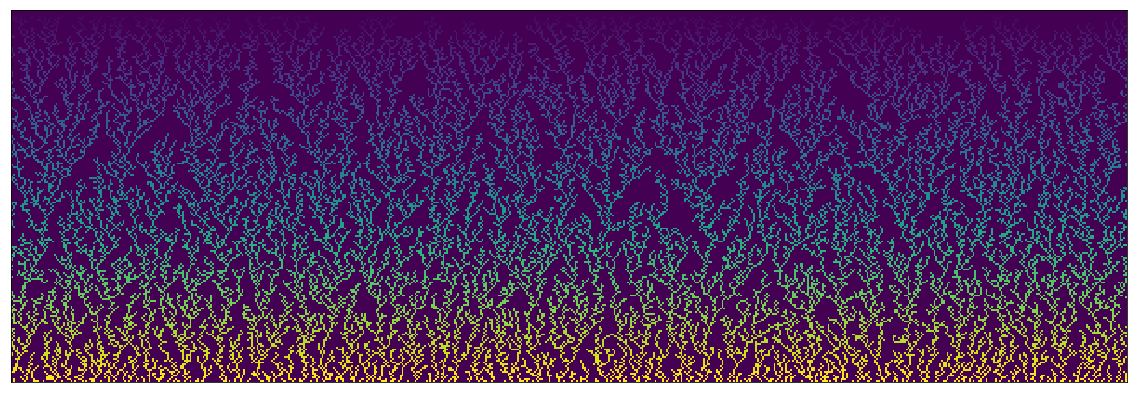

In [282]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))
plt.imshow(test_mat)
plt.xticks([])
plt.yticks([])
plt.show()

<h4> Separate function where the seeds are diffused like impurities, randomly throughout the matrix

In [265]:
def dla_impurity(nwalkers, width, height, seed = 42):
    """Function to model a Diffusion Limited Aggregation process for growth of fractals, corals etc
    Here we randomly seed the matrix with impurities -- how does this change the DLA process?
    """
    np.random.seed(seed)
    matrix = np.zeros([height, width])
    
    for counter in range(width*height//100):
        matrix[(np.random.randint(height-1), np.random.randint(width-1))] = 1

    
    for i in range(nwalkers):
        init_pos = np.random.randint(width-1)
        row_counter = 1
        while row_counter < height:
            init_pos = (init_pos + random_num_gen())%(width)
            if check_matrix(matrix, row_counter, init_pos, width, height):
                row_counter+=1
            else:
                matrix[row_counter, init_pos] = row_counter
                break
    return matrix[:-1, :]

In [268]:
%%time
test_mat = dla_impurity(100000, 300, 150)

CPU times: user 1.31 s, sys: 3.37 ms, total: 1.31 s
Wall time: 1.31 s


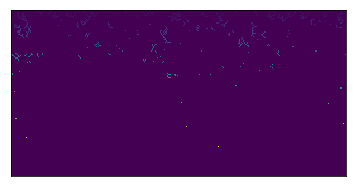

In [269]:
# Having a lot of impurities, kills the diffusion process.
plt.imshow(test_mat)
plt.xticks([])
plt.yticks([])
plt.show()